# Chi-Squared Distribution
#### by Elizabeth Barnes

So far we have mainly dealt with the normal distribution, however, there are a lot of other distributions out there! So, in this example we will work through an example to see how these other distributions can tell us about the statistical behaviour of our data.

In [42]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-

#.............................................
# IMPORT STATEMENTS
#.............................................
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import importlib

import general_functions as gf
importlib.reload(gf)
gf.add_parent_dir_to_path()

from lib import class_general_functions as cgf
importlib.reload(cgf)

#.............................................
# PLOTTING COMMANDS
#.............................................
gf.cc()
plt.ioff()

# Chi-Squared Distribution

Let's start out my making a "bucket" of a RV that is distributed according to a standard normal.

In [43]:
sigmaNormal = 1.
meanNormal = 0.

B = np.random.normal(loc = meanNormal, scale = sigmaNormal, size = 100000)       

Now, we will draw samples of length $N=25$ and calculate a funny statistic, which we will call $x2$. $x2$ is the ratio of the sample variance to the true variance of $B$, with a factor associated with $N$ thrown in. Don't worry why we do this for now, just know that we are.

In [44]:
N = 25

x2 = []
for i in np.arange(0,10000):
    sample = np.random.choice(B, size = N, replace = True)
    x2 = np.append(x2,(N-1)*(np.std(sample))**2/sigmaNormal**2)

Ok - now we have 10,000 values of x2. Let's plot their histogram and see what they look like! (I like to guess what the plot will look like before making it. For example, I see that x2 cannot be negative, so odds are it also has a long tail to the right...)

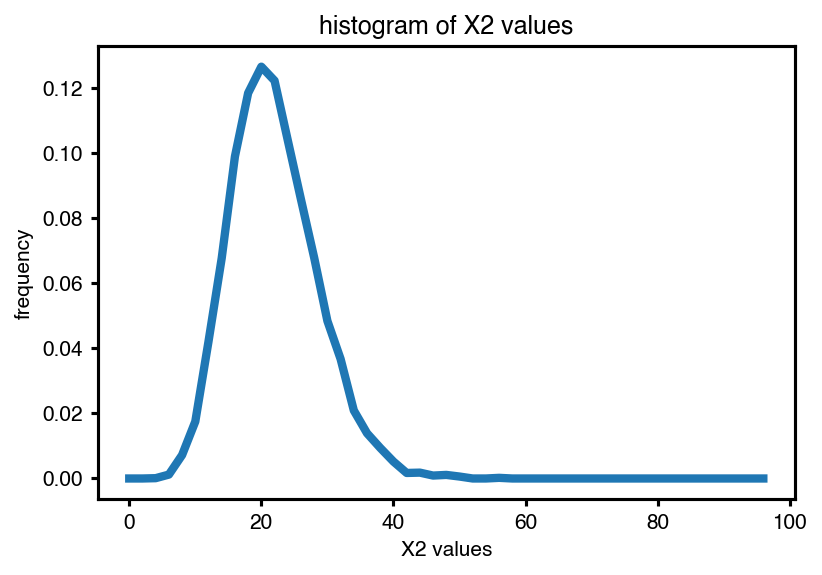

In [45]:
xbins = np.arange(0,100,2)
hx = np.histogram(x2,xbins)
plt.plot(xbins[:-1],hx[0]/len(x2), linewidth=4)
plt.title('histogram of X2 values')
plt.xlabel('X2 values')
plt.ylabel('frequency')
plt.show()

Well, there it is. Indeed, the $x2$ values never went negative and have a long tail to the right. So, why do we care about this? Well, this is the curve of the ratio of a sample variance to the _true_ variance of the data "bucket" the sample was drawn from. This is useful! 

It turns out that this distribution is known analytically, and is the _Chi-Squared Distribution_, as I will convince you of below.

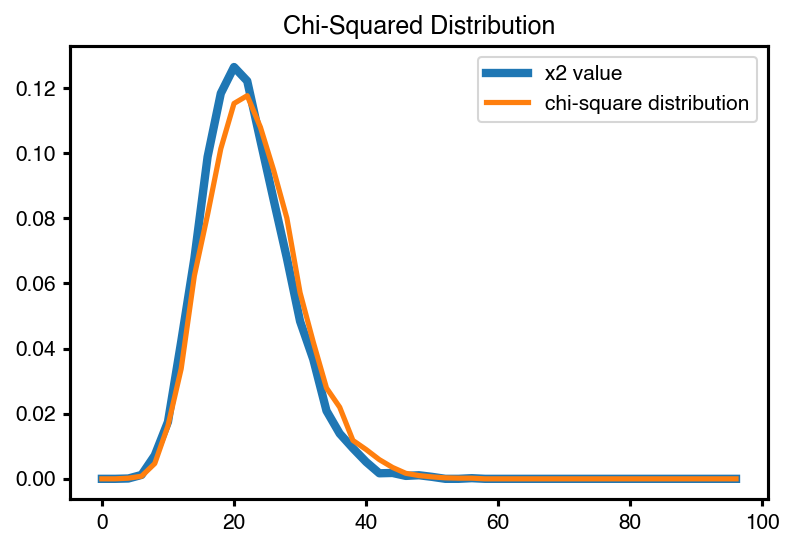

In [46]:
xbins = np.arange(0,100,2)
hx = np.histogram(x2,xbins)

chiSquare = np.random.chisquare(N-1,10000)
hcS = np.histogram(chiSquare,xbins)

plt.plot(xbins[:-1],hx[0]/len(x2),linewidth=4,label='x2 value')
plt.plot(xbins[:-1],hcS[0]/len(chiSquare),linewidth=2.5, label='chi-square distribution')
plt.title('Chi-Squared Distribution')
plt.legend()
plt.show()

So, let's code a little example of how this might actually be useful. Let's imagine we went out into the field and took some measurements

In [47]:
nSample = 35
muSample = 0.2
stdSample = 1.1

So, I'm wondering whether the variance of my sample (of my measurements) is different from what it "used to be". Say, we knew the variance was $\sigma^2 = 1$. 

In [48]:
stdPop = 1

If we also assume that the data I am sampling followed (and still follows) a normal distribution then, we can use the $\chi$-Squared distribution! First, we calculate our test statistic, x2.

In [49]:
x2Sample = (nSample-1)*(stdSample**2)/(stdPop**2)

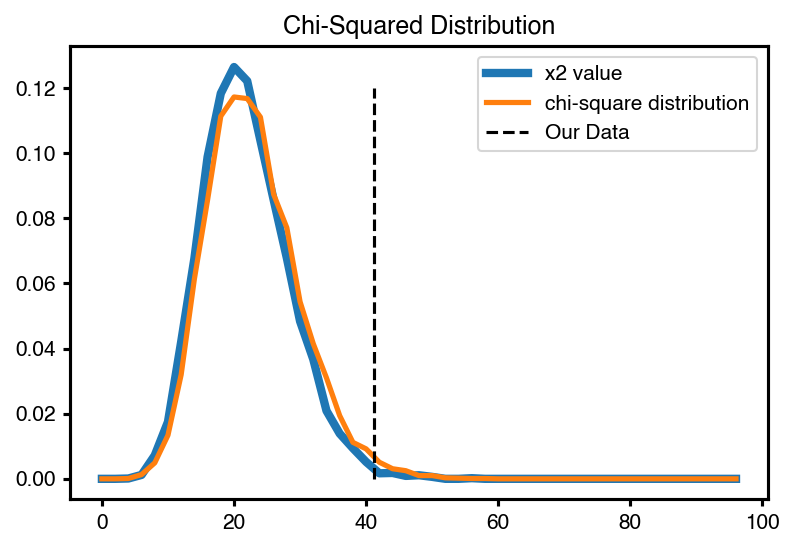

In [50]:
xbins = np.arange(0,100,2)
hx = np.histogram(x2,xbins)

chiSquare = np.random.chisquare(N-1,10000)
hcS = np.histogram(chiSquare,xbins)

plt.plot(xbins[:-1],hx[0]/len(x2),linewidth=4,label='x2 value')
plt.plot(xbins[:-1],hcS[0]/len(chiSquare),linewidth=2.5, label='chi-square distribution')

plt.plot((x2Sample,x2Sample),(0,.12),'--k',label='Our Data')

plt.title('Chi-Squared Distribution')
plt.legend()
plt.show()

Once again, by looking at how likely it is to get our test statistic or more extreme, we can assess whether the reject the null hypothesis that the variance has remained the same.

# F-statistic/distribution

While the Chi-Squared distribution is good for assessing the ratio of a sample variance to the true variance, the f-statistic is used to assess the ratio between two sample standard deviations $s_1$ and $s_2$.

Let's see where this comes from! Step 1, I'm going to create two buckets of normally distributed data.

In [51]:
sigmaNormal1 = 1.
meanNormal1 = 0.

sigmaNormal2 = 1
meanNormal2 = 0.

B1 = np.random.normal(loc = meanNormal1, scale = sigmaNormal1, size = 100000)       
B2 = np.random.normal(loc = meanNormal2, scale = sigmaNormal2, size = 100000)       

Step 2, let's draw samples from B1 and B2 of different sizes and calculated another weird statistic - this one we will call $F$. Let's do that a lot of times.

In [52]:
N1 = 50
N2 = 25

F = []
for i in np.arange(0,10000):
    sample1 = np.random.choice(B1, size = N1, replace = True)
    sample2 = np.random.choice(B2, size = N2, replace = True)
    
    s1 = np.var(sample1)
    s2 = np.var(sample2)    
    F = np.append(F,s1/s2)

As before, let's look at the distribution of $F$.

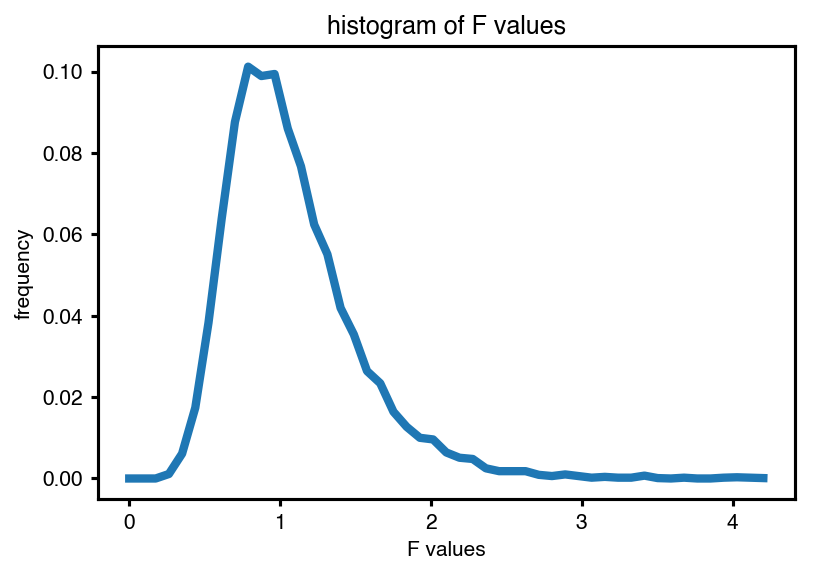

In [53]:
xbins = np.linspace(0,np.max(F),50)
hx = np.histogram(F,xbins)

plt.plot(xbins[:-1],hx[0]/len(x2), linewidth=4)
plt.title('histogram of F values')
plt.xlabel('F values')
plt.ylabel('frequency')
plt.show()

It turns out that this distribution is known analytically too. It is the _F-Distribution_, as I will convince you of below.

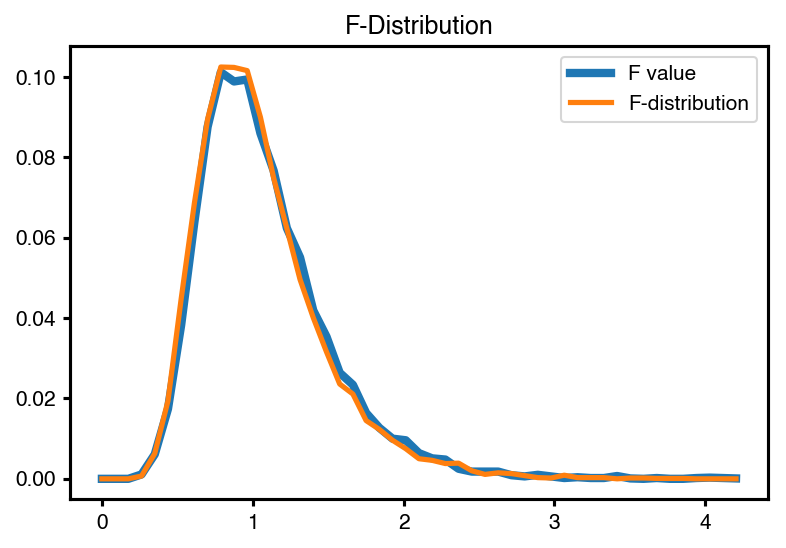

In [54]:
xbins = np.linspace(0,np.max(F),50)
hx = np.histogram(F,xbins)

dfNum = N1-1
dfDen = N2-1

FDist = np.random.f(dfNum,dfDen,10000)
hF = np.histogram(FDist,xbins)

plt.plot(xbins[:-1],hx[0]/len(F),linewidth=4,label='F value')
plt.plot(xbins[:-1],hF[0]/len(FDist),linewidth=2.5, label='F-distribution')
plt.title('F-Distribution')
plt.legend()
plt.show()

OK, let's go back to our example again, but this time, let's make the variances of B1 and B2 be _different_.

# Why is this useful? Here's why!

Say I collect two samples of data of unequal length. I go and calculate the variances of each of these samples, and they are different! The question is, are the differences in variance interesting?

In [55]:
#sample 1
N1 = 50
s1 = 8

#sample 2
N2 = 25
s2 = 4

I want to test if these two variances are statistically different from one another. Thus, my null hypothesis is that they came from the same underlying normal distribution - i.e. with the same variance!

I will calculate the F-statistic from my data.

In [56]:
F = s1/s2
print(F)

2.0


So, my first sample has twice the variance of my second sample. Is this a big enough difference to be possilby interesting? The F-statistic will tell me what to expect if my null hypothesis was true.

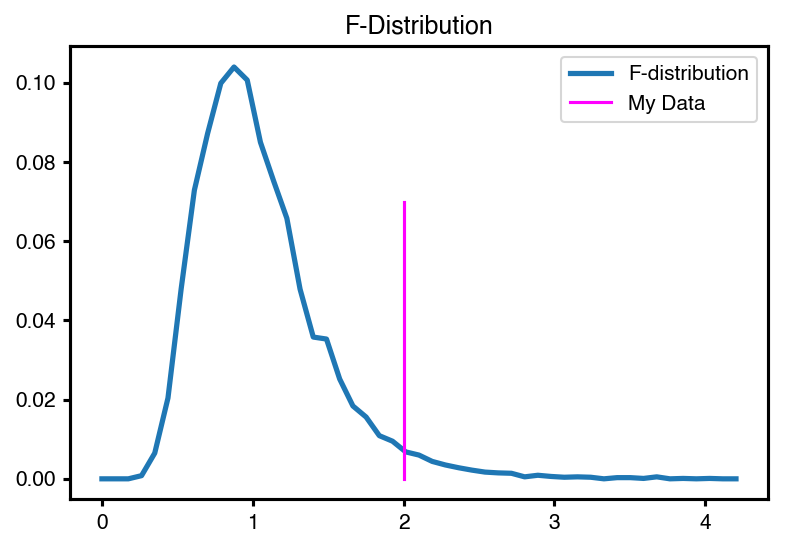

In [57]:
dfNum = N1-1
dfDen = N2-1

FDist = np.random.f(dfNum,dfDen,10000)
hF = np.histogram(FDist,xbins)

plt.plot(xbins[:-1],hF[0]/len(FDist),linewidth=2.5, label='F-distribution')

plt.plot((F,F),(0,.07),'-',color='fuchsia',label='My Data')

plt.title('F-Distribution')
plt.legend()
plt.show()

What is the probability of getting an F of 2 _or higher_ under the null that the two samples came from populations with equal variance?

In [58]:
1-stats.f.cdf(F,dfNum,dfDen)

0.03406840782774023

So, 3.4% chance. If my $\alpha=0.05$ I would reject my null hypothesis that the two samples came from populations with equal variance.